In [11]:
# importing packages
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression



Palmer Penguins Modeling
Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict bill_depth_mm using the other variables in the dataset.

Dummify all variables that require this.


In [12]:
# loading/cleaning data
penguins = load_penguins()
penguins = penguins.dropna()
#penguins.head()

Let's use the other variables to predict bill_depth_mm. Prepare your data and fit the following models on the entire dataset:

- Your best multiple linear regression model from before
- Two kNN models (for different values of K)
- A decision tree model


Create a plot like the right plot of Fig 1. in our Model Validation chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [13]:
# defining X and y

X = penguins.drop("bill_depth_mm", axis=1)
y = penguins["bill_depth_mm"]

# linear regression model

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), ["species", "sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

linear_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

# kNN model with k=3

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), ["species", "sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_3", KNeighborsRegressor(n_neighbors=3))]
).set_output(transform="pandas")

knn3_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

# kNN model with k=10

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), ["species", "sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("knn_10", KNeighborsRegressor(n_neighbors=10))]
).set_output(transform="pandas")

knn10_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1

# decision tree model

ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False, handle_unknown='ignore'), ["species", "sex", "island"]),
    ("standardize", StandardScaler(), ["bill_length_mm", "flipper_length_mm", "body_mass_g"])
  ],
  remainder = "drop"
)

pipeline = Pipeline(
  [("preprocessing", ct),
  ("Tree", DecisionTreeRegressor())]
).set_output(transform="pandas")

tree_mse = cross_val_score(pipeline, X, y, cv = 5, scoring = "neg_mean_squared_error").mean() * -1




In [9]:
# printing MSE values
mse_scores = {
    "Model": ["Linear Regression", "kNN (k=3)", "kNN (k=10)", "Decision Tree"],
    "MSE": [linear_mse, knn3_mse, knn10_mse, tree_mse]
}

mse_df = pd.DataFrame(mse_scores)

print(mse_df)



               Model       MSE
0  Linear Regression  0.826275
1          kNN (k=3)  1.105884
2         kNN (k=10)  1.123421
3      Decision Tree  1.550864


My best model was the linear regression model.

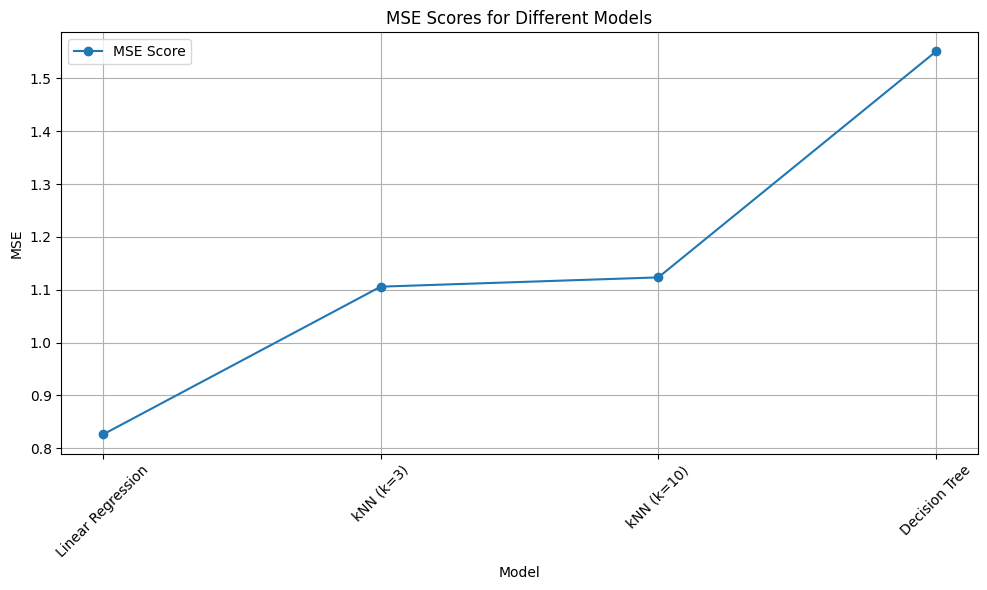

In [10]:
# plotting MSE scores across models

df = mse_df.sort_values(by="MSE")

plt.figure(figsize=(10, 6))
plt.plot(df["Model"], df["MSE"], marker='o', label='MSE Score')

plt.xlabel('Model')
plt.ylabel('MSE')
plt.title('MSE Scores for Different Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid()
plt.show()